In [1]:
# imports and loading
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import seaborn as sns

data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')
ica_data = load_json_model(path.join(interim_dir,'zmo_raw.json.gz'))

import pandas as pd

import matplotlib.pyplot as plt
import mplcursors
from matplotlib.lines import Line2D

def custom_compare_activities(ica_data, imodulon1, imodulon2, color_by_col = '', **kwargs):
    """
    Create an interactive scatterplot comparing the compendium-wide activities of two iModulons.

    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon1: int or str
        Name of the iModulon to plot on the x-axis
    imodulon2: int or str
        Name of the iModulon to plot on the y-axis
    **kwargs:
        Additional keyword arguments passed to :func:`pymodulon.plotting.scatterplot`

    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the scatterplot
    """
    
    # Extract data
    x = ica_data.A.loc[imodulon1]
    y = ica_data.A.loc[imodulon2]
    c = ['blue' for _ in x]
    if len(color_by_col) > 0:
        df = ica_data.sample_table[color_by_col]
        unique_categories = df.unique()
        cmap = plt.get_cmap('tab20')
        category_colors = {category: cmap(i / len(unique_categories)) for i, category in enumerate(unique_categories)}
        c = df.map(category_colors).tolist()
        
        
    labels = ica_data.sample_table.full_name.values

    xlabel = f"{imodulon1} iModulon Activity"
    ylabel = f"{imodulon2} iModulon Activity"

    # Remove xlabel, ylabel, and fit_line kwargs if provided
    kwargs.pop("xlabel", None)
    kwargs.pop("ylabel", None)
    kwargs.pop("fit_line", None)

    # Scatter Plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c = c, **kwargs)

    # Set axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Add interactive cursor for hovering
    cursor = mplcursors.cursor(scatter, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.index])  # Show label for hovered point
    
    if len(color_by_col) > 0:
        legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category) 
                       for category, color in category_colors.items()]

        # Add the custom legend
        plt.legend(handles=legend_elements, title=color_by_col, loc='upper left', bbox_to_anchor=(1, 1))
        plt.subplots_adjust(right=.6)
    return ax

#%matplotlib widget

In [2]:
keep = []
df = ica_data.gene_table
for index, row in df.iterrows():
    if 'sucrose' in str(row['gene_product']).lower():
        keep.append(index)
df.loc[keep]

,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,operon,kegg_maps,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,interpro_annotation,chromosome_id,iMs


In [3]:
iM1 = 'nitrogen_fixation'
iM2 = 'membrane_cobalmin'

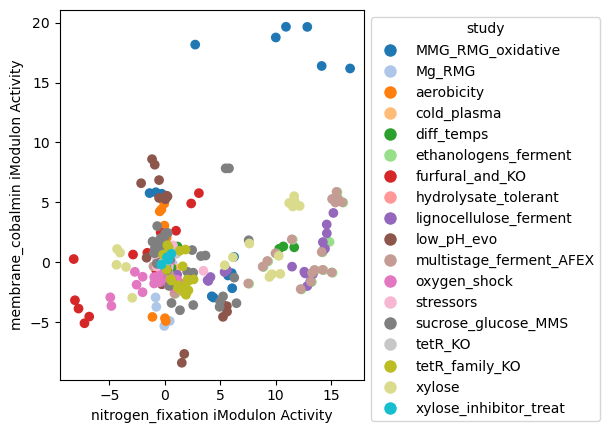

In [4]:
custom_compare_activities(ica_data, iM1, iM2, color_by_col = 'study')
plt.show()

In [30]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width
ica_data.view_imodulon(iM1).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,operon,kegg_maps,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,interpro_annotation,chromosome_id
ZCP4_1340,0.289245,ZCP4_1340,CP006818.1,1507443.0,1507655.0,+,molybdenum-pterin binding domain protein,Coenzyme transport and metabolism,"ZCP4_0265,ZCP4_0523,ZCP4_1046,ZCP4_1382,ZCP4_1585,ZCP4_1718",Q5NLE8,Op1427,NaN,NaN,ZMO1_ZMO1838,0.000000,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1332,0.241643,ZCP4_1332,CP006818.1,1500058.0,1501107.0,+,ABC-type Fe3+-hydroxamate transport system%2C periplasmic component,Inorganic ion transport and metabolism,"ZCP4_0018,ZCP4_0128,ZCP4_0265,ZCP4_1382,ZCP4_1387,ZCP4_1718",Q5NLD8,Op1419,map02010,NaN,ZMO1_ZMO1848,0.000000,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1749,0.238548,ZCP4_1749,CP006818.1,1979231.0,1980301.0,+,transcriptional regulator%2C AraC family,Transcription,"ZCP4_0375,ZCP4_1382,ZCP4_1387,ZCP4_1387",Q5NMQ6,Op1820,NaN,NaN,ZMO1_ZMO1380,0.000000,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1362,0.206583,ZCP4_1362,CP006818.1,1526842.0,1528548.0,-,Nif-specific regulatory protein,Transcription,NaN,Q5NLH0,Op1449,map02020,NaN,ZMO1_ZMO1816,0.000000,0.0,Insulin-like growth factor-binding protein (IGFBP) N-terminal domain signature.;SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1750,0.177515,ZCP4_1750,CP006818.1,1980621.0,1982030.0,+,ethanolamine:proton symporter%2C EAT family,Amino acid transport and metabolism,NaN,NaN,Op1821,NaN,NaN,ZMO1_ZMO1378,0.000000,0.0,"C-terminal region of a signal peptide.;Hydrophobic region of a signal peptide.;N-terminal region of a signal peptide.;Region of a membrane-bound protein predicted to be outside the membrane, in the extracellular region.;Signal peptide region;SignalP-TM;SignalP-noTM",CP006818.1
ZCP4_0718,0.174513,ZCP4_0718,CP006818.1,812588.0,813736.0,-,PLP-dependent enzyme%2C histidinol-phosphate/aromatic aminotransferase or cobyric acid decarboxylase,Amino acid transport and metabolism,NaN,Q5NQ21,Op830,map00340;map00350;map00360;map00400;map00401;map00960;map01100;map01110;map01130;map01230,2.6.1.9,ZMO1_ZMO0562,0.000000,0.0,4Fe-4S ferredoxin-type iron-sulfur binding region signature.;SignalP-TM,CP006818.1
ZCP4_0910,0.172327,ZCP4_0910,CP006818.1,1008064.0,1009038.0,-,Putative MetA-pathway of phenol degradation,Energy production and conversion,"ZCP4_0128,ZCP4_0210,ZCP4_0375,ZCP4_0375,ZCP4_1382,ZCP4_1387,ZCP4_1465,ZCP4_1637,ZCP4_1718",Q5NQL9,Op1014,NaN,NaN,ZMO1_ZMO0361,0.000000,0.0,Insulin-like growth factor-binding protein (IGFBP) N-terminal domain signature.;SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1333,0.164500,ZCP4_1333,CP006818.1,1501114.0,1502127.0,+,ABC-type Fe3+-siderophore transport system%2C permease component,Inorganic ion transport and metabolism,"ZCP4_0265,ZCP4_1387,ZCP4_1387",H2VFP3,Op1420,map02010,NaN,ZMO1_ZMO1847,0.000000,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_0790,0.154578,ZCP4_0790,CP006818.1,884479.0,884817.0,-,nitrogen regulatory protein P-II family,Transcription,NaN,Q5NQ89,Op899,map02020,NaN,ZMO1_ZMO0492,0.000000,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_0049,0.148044,ZCP4_0049,CP006818.1,55066.0,57483.0,-,outer membrane cobalamin receptor protein,Inorganic ion transport and metabolism,"ZCP4_0018,ZCP4_0128,ZCP4_0375,ZCP4_0523,ZCP4_0530,ZCP4_1194,ZCP4_1382,ZCP4_1718",Q5NMY8,Op191,NaN,NaN,ZMO1_ZMO1986,0.000000,0.0,"C-terminal region of a signal peptide.;Hydrophobic region of a signal peptide.;N-terminal region of a signal peptide.;Region of a membrane-bound protein predicted to be outside the membrane, in the extracellular region.;Signal peptide region;SignalP-TM;SignalP-noTM",CP006818.1


In [31]:
ica_data.view_imodulon(iM2).sort_values(by = 'gene_weight', key = abs, ascending = False)

,gene_weight,gene_name,accession,start,end,strand,gene_product,COG,regulator,uniprot,operon,kegg_maps,EC_number,ZM4_locus,aerobic_essential,anaerobic_essential,interpro_annotation,chromosome_id
ZCP4_1123,0.356791,ZCP4_1123,CP006818.1,1266988.0,1267425.0,-,transcriptional regulator%2C BadM/Rrf2 family,Transcription,"ZCP4_0128,ZCP4_0530,ZCP4_1194,ZCP4_1718",Q5NRB4,Op1222,NaN,NaN,ZMO1_ZMO0116,0.0,0.0,SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1122,0.348780,hcp,CP006818.1,1265284.0,1266921.0,-,hydroxylamine reductase,Energy production and conversion,NaN,Q5NRB3,Op1221,map00910,1.7.99.1,ZMO1_ZMO0117,0.0,0.0,"C-terminal region of a signal peptide.;Hydrophobic region of a signal peptide.;N-terminal region of a signal peptide.;Region of a membrane-bound protein predicted to be outside the membrane, in the extracellular region.;Signal peptide region;SignalP-TM;SignalP-noTM",CP006818.1
ZCP4_1216,0.227018,ZCP4_1216,CP006818.1,1366820.0,1369189.0,-,outer membrane receptor protein,Inorganic ion transport and metabolism,NaN,Q5NRM9,Op1314,NaN,NaN,NaN,0.0,0.0,Insulin-like growth factor-binding protein (IGFBP) N-terminal domain signature.;SignalP-TM;SignalP-noTM,CP006818.1
ZCP4_1695,0.217509,ZCP4_1695,CP006818.1,1917427.0,1918059.0,+,putative threonine efflux protein,Amino acid transport and metabolism,"ZCP4_1046,ZCP4_1387",Q5NMJ9,Op1768,NaN,NaN,ZMO1_ZMO1437,0.0,0.0,"C-terminal region of a signal peptide.;Hydrophobic region of a signal peptide.;N-terminal region of a signal peptide.;Region of a membrane-bound protein predicted to be outside the membrane, in the extracellular region.;Signal peptide region;SignalP-TM;SignalP-noTM",CP006818.1


In [13]:
df = ica_data.sample_table
samps = df[df['study'] == 'ethanologens_ferment'].index
bby_A = ica_data.A[samps]
bby_A['mean'] = abs(bby_A).mean(axis = 1)
bby_A.sort_values(by = 'mean', key = abs, ascending = False).head()

/opt/anaconda3/envs/pymodulon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SRX5329169,SRX5329170,SRX5329171,SRX5329172,SRX5329173,SRX5329174,SRX5329175,SRX5329176,SRX5329177,SRX5329178,...,SRX5329186,SRX5329187,SRX5329188,SRX5329189,SRX5329190,SRX5329191,SRX5329192,SRX5329193,SRX5329194,mean
translation_1,-19.068447,0.496391,-0.204973,-19.633593,-10.986669,2.909821,-1.155018,-15.874779,1.250129,-21.103399,...,-21.364896,-13.623367,-17.419898,-21.601870,-21.447648,-21.342877,-10.712371,-13.828143,1.734090,12.157167
nitrogen_fixation,13.566857,-0.434658,0.489943,14.309458,9.318660,-0.263021,-0.134102,13.257256,-0.393272,14.225642,...,15.565945,11.535500,13.357999,16.086894,15.164401,15.128054,8.902487,12.334899,-0.947350,8.997738
motility_1,-11.122430,-0.393978,-5.448388,-13.054859,-11.548374,-3.065194,-4.583000,-15.177976,-2.455192,-12.310056,...,-9.067171,-13.421108,-11.757509,-8.210655,-8.910599,-13.438679,-10.292713,-15.857675,-5.676033,8.879130
ATP_synthase_1,-9.280084,0.473194,-0.422106,-12.199288,-3.285730,-0.144011,1.214841,-10.990825,-0.528180,-9.156500,...,-18.649176,-6.372871,-10.372200,-16.512211,-16.973777,-16.949538,-2.818850,-6.374612,0.336287,7.453166
iron_transport,-8.563226,-2.272171,-0.630287,-8.851163,-7.277762,-12.514311,-11.995157,-8.686614,-10.012886,-7.582308,...,-3.460327,-6.718352,-8.804349,-2.854772,-3.172989,-8.632750,-5.913533,-10.280110,-9.163993,6.952528


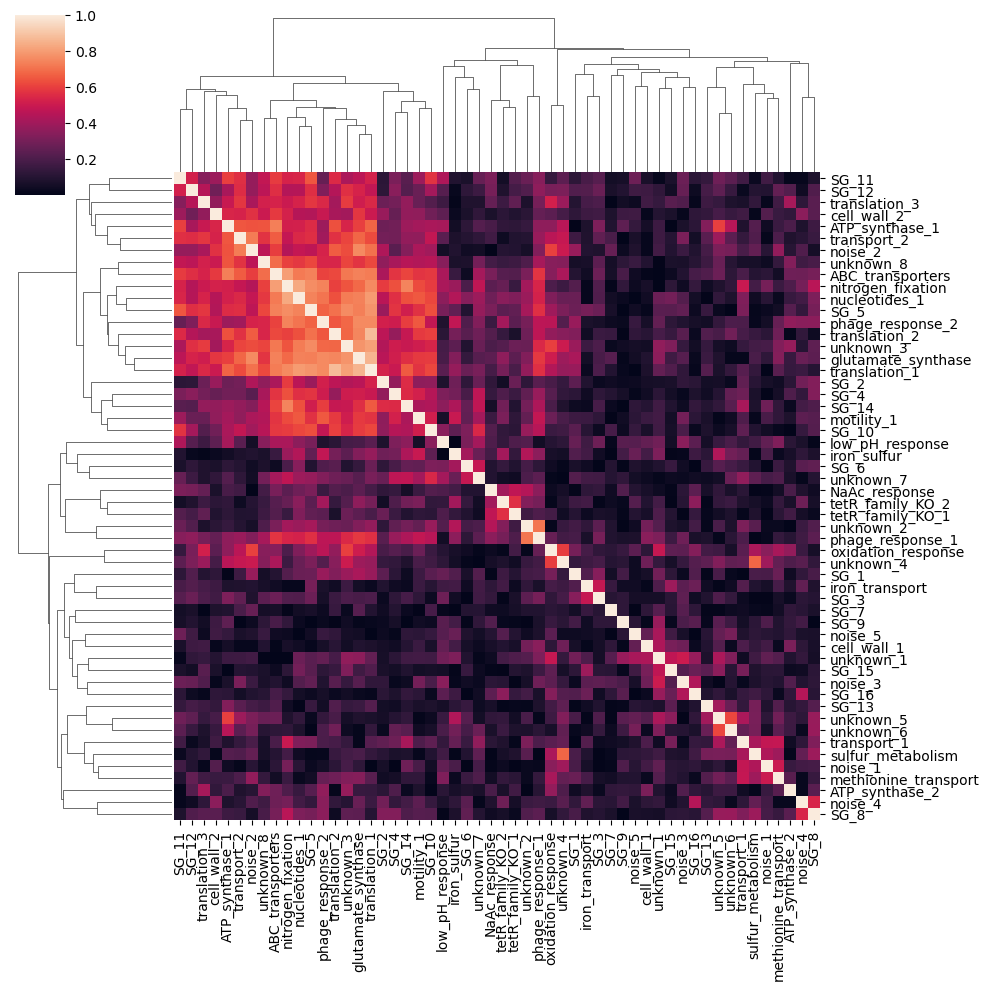

In [19]:
sns.clustermap(abs(ica_data.A.T.corr()), xticklabels=True, yticklabels=True)
plt.show()

# looking into specific metadata activities

In [33]:
df = ica_data.sample_table
samples = df[df['Aerobicity'] == 'aerobic'].index
df_A = ica_data.A[samples].copy()
df_A['mean'] = df_A.mean(axis = 1)
df_A.sort_values(by = 'mean', key = abs, ascending = False).head()

,Kiley_A_DZM0422_Aerobic_A,Kiley_A_DZM0422_Aerobic_B,Kiley_A_DZM0422_Aerobic_C,Kiley_A_WT_Aerobic_A,Kiley_A_WT_Aerobic_B,Kiley_A_WT_Aerobic_C,Kiley_B_WT_+O2_Ctrl_A,Kiley_B_WT_+O2_Ctrl_B,Kiley_B_WT_+O2_Ctrl_C,Kiley_B_WT_+O2_Paraquat_A,Kiley_B_WT_+O2_Paraquat_B,Kiley_B_WT_+O2_Paraquat_C,SRX3316537,SRX3316540,SRX3316548,SRX3316550,SRX3316559,mean
fermentation_stress_response_maybe,7.335280,9.484871,7.700632,6.088402,5.668351,5.148396,8.644250,7.437876,6.278454,10.941776,10.221641,9.757518,15.018631,7.263589,17.329134,-0.583992,0.879319,7.918478
oxidation_response,9.885250,10.122263,9.639106,9.723516,9.801443,9.667196,3.494748,2.667199,2.888938,14.523500,11.742961,14.180787,3.547148,-0.948046,4.825983,0.466309,4.117780,7.079181
iron_ABC_transport,-14.878521,-14.755852,-14.976375,-4.606355,-4.553696,-4.054223,-0.451063,0.008628,-0.430405,-2.916887,-1.654444,-2.720177,-1.280081,0.862068,-2.433175,-0.791366,-0.592455,-4.130846
translation_1,-3.246716,-3.712392,-3.099570,-2.675524,-2.152655,-2.530814,-2.072103,-2.176066,-1.680727,-1.421172,-1.527749,-1.645034,-19.830110,-1.733975,-15.468173,-1.906342,2.426253,-3.791345
NaAc_response,3.784216,4.885075,4.455290,7.457384,6.776195,6.683214,4.904664,5.379546,3.627818,3.772869,3.771820,4.347521,-1.000509,-4.990443,0.387934,-1.818151,-0.144542,3.075288


In [34]:
df = ica_data.sample_table
samples = df[df['Carbon Source (g/L)'] == 'xylose'].index
df_A = ica_data.A[samples].copy()
df_A['exp_var'] = ica_data.imodulon_table['explained_variance'].loc[df_A.index]
df_A['std_dev'] = df_A.std(axis = 1)
df_A['mean'] = df_A.mean(axis = 1)
df_A = df_A[df_A.columns[::-1]]
df_A = df_A[df_A['exp_var'] > 0.02]
df_A.sort_values(by = 'mean', key = abs, ascending = False)

,mean,std_dev,exp_var,SRX3541453,SRX3541452,SRX3541451,SRX3541450,SRX3541449,SRX3541445,SRX3541444,...,SRX6700183,SRX6700182,SRX6700181,SRX6700180,SRX6700173,SRX6700172,SRX6700171,SRX6700170,SRX6700169,SRX6700168
translation_1,-17.076081,4.464872,0.064458,-16.723998,-17.130700,-19.420271,-17.039259,-16.840681,-12.823876,-14.454336,...,-21.604583,-14.757824,-14.926019,-15.347307,-21.794321,-23.117117,-20.199043,-14.821889,-15.055730,-14.018694
nitrogen_fixation,12.497279,2.870948,0.024466,11.659404,11.715183,11.539513,12.154704,11.209166,9.431653,9.647964,...,14.440489,12.844351,13.341014,13.117435,15.197360,14.607092,14.597009,12.575175,12.651490,11.470131
glycolysis_and_ATP_synthase,-10.130238,5.483296,0.027866,-17.045236,-16.090108,-16.125966,-14.909694,-15.369655,-8.762317,-7.673726,...,-10.095521,-2.401455,-3.366530,-1.970703,-10.386846,-9.580284,-7.341944,-3.769619,-3.342233,-2.412620
phage_formation,8.623955,2.237683,0.024947,8.966342,8.782168,10.898162,10.995466,8.599329,7.331107,7.363011,...,9.854268,7.958024,8.366785,8.241637,10.098000,7.965941,8.610931,7.441289,8.039905,6.802368
fructose_transport_maybe,8.020539,2.608085,0.027889,7.648177,8.122629,9.501770,9.571610,8.182888,6.208180,7.974434,...,11.497616,5.902347,6.564173,6.724097,12.810017,12.428179,12.031415,7.091360,7.197710,6.287272
fermentation_stress_response_maybe,-1.995387,2.431557,0.036618,-3.974790,-3.818856,-3.773826,-2.786806,-3.667038,-3.204136,-1.314944,...,-1.615837,3.387649,1.270713,3.711692,-6.089410,-4.758915,-4.595090,-1.760358,0.225784,-0.392535
